In [1]:
%matplotlib inline
import os
import re
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

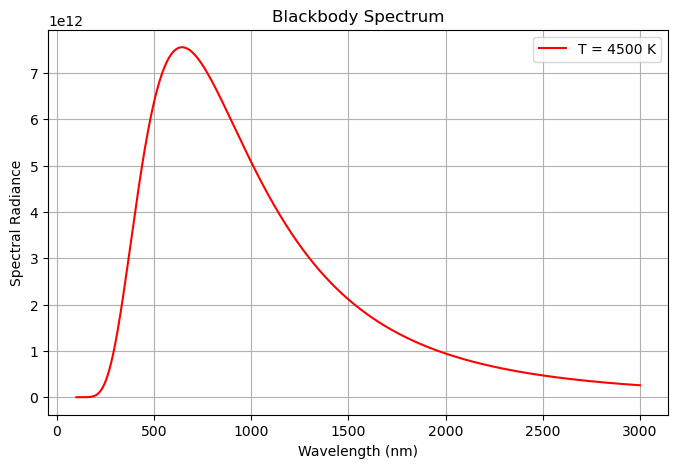

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann as k, pi, speed_of_light as c, h

# Define temperature (K)
T = 4500  

# Define wavelength range (m)
wavelengths = np.linspace(100e-9, 3000e-9, 1000)  # 100 nm to 3000 nm

# Planck's Law function
def planck(wavelength, T):
    return (2*h*c**2) / (wavelength**5) / (np.exp(h*c / (wavelength * k * T)) - 1)

# Compute spectral radiance
intensity = planck(wavelengths, T)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(wavelengths * 1e9, intensity, label=f"T = {T} K", color='red')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Spectral Radiance")
plt.title("Blackbody Spectrum")
plt.legend()
plt.grid()
plt.show()


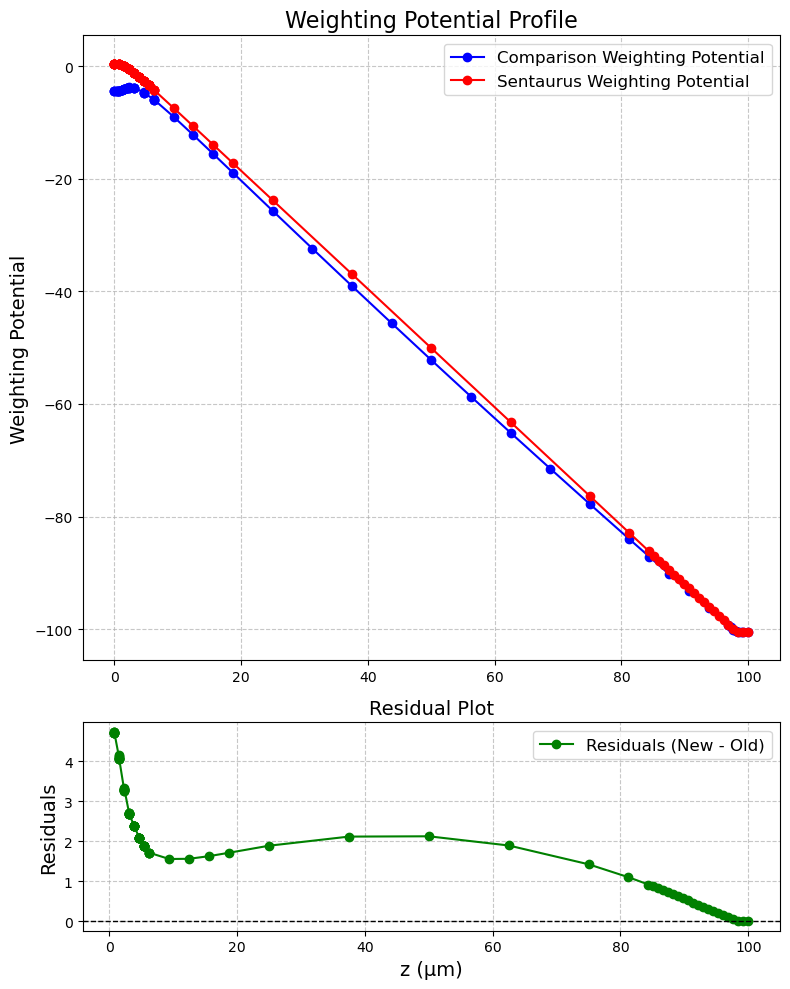

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Function to read data from file
def read_data(filename):
    z = []
    wpot = []
    with open(filename, "r") as file:
        for line in file:
            try:
                columns = line.split()
                z_val = float(columns[0])
                wpot_val = float(columns[1])
                z.append(z_val)
                wpot.append(wpot_val)
            except (IndexError, ValueError):
                continue
    return np.array(z), np.array(wpot)

# Read data from both files
z_old, wpot_old = read_data("wplot.out")
z_new, wpot_new = read_data("wplot_new.out")

# Interpolate old data onto new data's z values for comparison
interp_func = interp1d(z_old, wpot_old, bounds_error=False, fill_value="extrapolate")
wpot_old_interp = interp_func(z_new)

# Calculate residuals
residuals = wpot_new - wpot_old_interp

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [3, 1]})

# Main plot for weighting potentials
axs[0].plot(z_old, wpot_old, marker='o', linestyle='-', color='b', label="Comparison Weighting Potential")
axs[0].plot(z_new, wpot_new, marker='o', linestyle='-', color='r', label="Sentaurus Weighting Potential")
axs[0].set_title("Weighting Potential Profile", fontsize=16)
#axs[0].set_xlabel("z (µm)", fontsize=14)
axs[0].set_ylabel("Weighting Potential", fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].legend(fontsize=12)

# Residual plot
axs[1].plot(z_new, residuals, marker='o', linestyle='-', color='g', label="Residuals (New - Old)")
axs[1].axhline(0, color='k', linestyle='--', linewidth=1)  # Add a horizontal line at 0
axs[1].set_title("Residual Plot", fontsize=14)
axs[1].set_xlabel("z (µm)", fontsize=14)
axs[1].set_ylabel("Residuals", fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].legend(fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


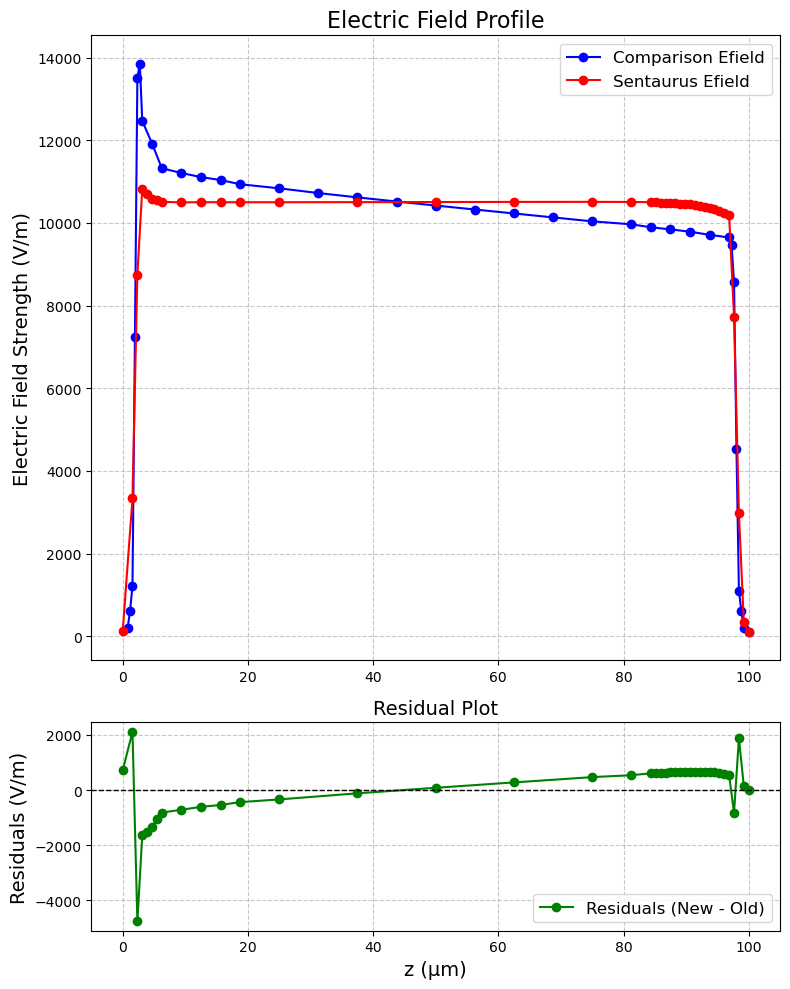

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Function to read data from file
def read_data(filename):
    z = []
    efield = []
    with open(filename, "r") as file:
        for line in file:
            try:
                columns = line.split()
                z_val = float(columns[0])
                efield_val = float(columns[1])
                z.append(z_val)
                efield.append(efield_val)
            except (IndexError, ValueError):
                continue
    return np.array(z), np.array(efield)

# Read data from both files
z_old, efield_old = read_data("eplot.out")
z_new, efield_new = read_data("eplot_new.out")

# Interpolate old electric field data onto the new data's z values
interp_func = interp1d(z_old, efield_old, bounds_error=False, fill_value="extrapolate")
efield_old_interp = interp_func(z_new)

# Calculate residuals
residuals = efield_new - efield_old_interp

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [3, 1]})

# Main plot for electric field profiles
axs[0].plot(z_old, efield_old, marker='o', linestyle='-', color='b', label="Comparison Efield")
axs[0].plot(z_new, efield_new, marker='o', linestyle='-', color='r', label="Sentaurus Efield")
axs[0].set_title("Electric Field Profile", fontsize=16)
#axs[0].set_xlabel("z (µm)", fontsize=14)
axs[0].set_ylabel("Electric Field Strength (V/m)", fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].legend(fontsize=12)

# Residual plot
axs[1].plot(z_new, residuals, marker='o', linestyle='-', color='g', label="Residuals (New - Old)")
axs[1].axhline(0, color='k', linestyle='--', linewidth=1)  # Add a horizontal line at 0
axs[1].set_title("Residual Plot", fontsize=14)
axs[1].set_xlabel("z (µm)", fontsize=14)
axs[1].set_ylabel("Residuals (V/m)", fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].legend(fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
